<a href="https://colab.research.google.com/github/ayushakar1/Pycamp/blob/main/project_ayusha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

store = pd.read_csv("/content/googleplaystore.csv")

store.head(10)
 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [ ]:
store.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

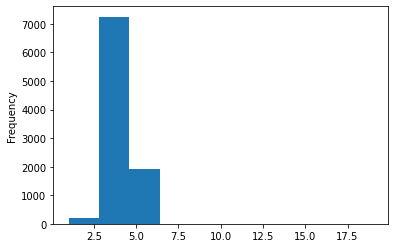

In [ ]:
store.Rating.plot(kind="hist")

In [ ]:
store.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
LIBRARIES_AND_DEMO       85
AUTO_AND_VEHICLES        85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [4]:
store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [14]:
def information():
   temp = pd.DataFrame(index=store.columns)
   temp['datatype'] = store.dtypes
   temp['null_amount'] = store.isnull().sum()
   temp['unique_count'] = store.nunique()
   return temp


In [13]:
information()

,datatype,null_amount,unique_count
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [15]:
store[store.Type.isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [16]:
store['Type'].fillna("Free", inplace = True)

In [18]:
store.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [19]:
store[store['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [20]:
store.loc[10468:10477, :]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10468,Tassa.fi Finland,LIFESTYLE,3.6,346,7.5M,"50,000+",Free,0,Everyone,Lifestyle,"May 22, 2018",5.5,4.0 and up
10469,TownWiFi | Wi-Fi Everywhere,COMMUNICATION,3.9,2372,58M,"500,000+",Free,0,Everyone,Communication,"August 2, 2018",4.2.1,4.2 and up
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up
10476,Lennox iComfort Wi-Fi,LIFESTYLE,3.0,552,7.6M,"50,000+",Free,0,Everyone,Lifestyle,"March 22, 2017",2.0.15,2.3.3 and up
10477,Sci-Fi Sounds and Ringtones,PERSONALIZATION,3.6,128,11M,"10,000+",Free,0,Everyone,Personalization,"September 27, 2017",4,4.0 and up


In [21]:
store.dropna(subset= ['Content Rating'], inplace=True)

In [22]:
store.drop(['Current Ver','Last Updated','Android Ver'], axis=1, inplace=True)

In [23]:
modeValueRating = store['Rating'].mode()

In [24]:
store['Rating'].fillna(value= modeValueRating[0], inplace = True)

In [25]:
information()

,datatype,null_amount,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,object,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [27]:
store['Reviews'] = store.Reviews.astype(int)
information()

,datatype,null_amount,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,object,0,461
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [28]:
store['Size'] = store.Size.apply(lambda x: x.strip('+'))   #plus sign removal

In [29]:
store['Size'] = store.Size.apply(lambda x: x.replace(',',''))  #comma removal

In [30]:
store['Size'] = store.Size.apply(lambda x: x.replace('M','e+6')) #converting M
store['Size'] = store.Size.apply(lambda x: x.replace('k','e+3'))  #converting k

In [31]:
store['Size'] = store.Size.replace('Varies with device',np.NaN)

In [33]:
#finally coverting to int

store['Size'] = pd.to_numeric(store['Size'])
information()

,datatype,null_amount,unique_count
App,object,0,9659
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,6001
Size,float64,1695,459
Installs,object,0,21
Type,object,0,2
Price,object,0,92
Content Rating,object,0,6
Genres,object,0,119


In [34]:
store.dropna(subset= ['Size'], inplace= True)

In [35]:
store['Installs'] = store.Installs.apply(lambda x: x.strip('+'))

In [36]:
store['Installs'] = store.Installs.apply(lambda x: x.replace(',',''))

In [38]:
store['Installs'] = pd.to_numeric(store['Installs'])
information()

,datatype,null_amount,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,object,0,87
Content Rating,object,0,6
Genres,object,0,116


In [39]:
#converting price column
store['Price'].value_counts()

0         8421
$0.99      145
$2.99      114
$1.99       66
$4.99       65
          ... 
$2.56        1
$19.40       1
$3.61        1
$1.29        1
$4.84        1
Name: Price, Length: 87, dtype: int64

In [41]:
#converting dollar sign

store['Price'] = store.Price.apply(lambda x: x.strip('$'))
store['Price'] = pd.to_numeric(store['Price'])

In [42]:
information()

,datatype,null_amount,unique_count
App,object,0,8434
Category,object,0,33
Rating,float64,0,39
Reviews,int64,0,4680
Size,float64,0,459
Installs,int64,0,20
Type,object,0,2
Price,float64,0,87
Content Rating,object,0,6
Genres,object,0,116
